# Leistungsnachweis – Analyse eines Datensatzes
# Age when first had anxiety or depression (2020)
Ziel dieses Leistungsnachweises ist die Analyse eines Datensatzes zum Thema psychische Gesundheit.
Untersucht wird, in welchem Alter Menschen erstmals Angst oder Depressionen empfunden haben.
Die Analyse erfolgt mit Python unter Verwendung der Bibliotheken pandas und matplotlib.


---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- "Age_when_First_Experiencing_Anxiety_or_Depression"

### 1.2 Fragestellung:
- In welchem Alter berichten Menschen in verschiedenen Weltregionen erstmals,
Angst- oder Depressionssymptome erlebt zu haben?


### 1.3 Datenquelle(n):
- https://ourworldindata.org

- https://ourworldindata.org/grapher/age-when-first-had-anxiety-depression


### 1.4 Daten beschaffen und laden

In [65]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [66]:
# lade hier deine Daten
import pandas as pd
df = pd.read_csv("age-when-first-had-anxiety-depression.csv")
df.head()


,Entity,Code,Year,Share - Question: mh7b_2 - Age range when first felt anxious/depressed - Answer: Ages <13 - Gender: all - Age group: all,Share - Question: mh7b_2 - Age range when first felt anxious/depressed - Answer: Ages 13-19 - Gender: all - Age group: all,Share - Question: mh7b_2 - Age range when first felt anxious/depressed - Answer: Ages 20-29 - Gender: all - Age group: all,Share - Question: mh7b_2 - Age range when first felt anxious/depressed - Answer: Ages 30-39 - Gender: all - Age group: all,Share - Question: mh7b_2 - Age range when first felt anxious/depressed - Answer: Ages ≥40 - Gender: all - Age group: all,Share - Question: mh7b_2 - Age range when first felt anxious/depressed - Answer: Don't know/Refused - Gender: all - Age group: all
0,Africa,NaN,2020,1.271836,14.229228,22.264650,16.803090,2.706476,42.724724
1,Asia,NaN,2020,7.795371,9.628078,23.403633,12.663021,9.983976,36.525925
2,Europe,NaN,2020,9.083381,22.210781,22.034777,7.628320,24.531280,14.511458
3,High-income countries,NaN,2020,2.473921,24.484507,10.832585,16.975899,16.115680,29.117413
4,Lower-middle-income countries,NaN,2020,8.800553,8.485406,26.288944,8.428943,7.348721,40.647434


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

Der vorliegende Datensatz liegt im sogenannten Wide-Format vor.
Jede Zeile repräsentiert eine Weltregion bzw. Einkommensgruppe,
während die verschiedenen Alterskategorien als einzelne Spalten
abgebildet sind.

Zusätzlich enthalten die Daten Informationen zur Region (Entity),
zum Jahr der Erhebung sowie zum Ländercode. Die Werte stellen
prozentuale Anteile dar.


In [67]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Entity                                                                                                                              7 non-null      object 
 1   Code                                                                                                                                1 non-null      object 
 2   Year                                                                                                                                7 non-null      int64  
 3   Share - Question: mh7b_2 - Age range when first felt anxious/depressed - Answer: Ages <13 

Die Ausgabe von df.info() zeigt, dass der Datensatz aus 7 Beobachtungen
und 9 Variablen besteht. Die Variablen „Entity“ und „Code“ sind als
kategoriale Variablen (object) gespeichert, während das Jahr als
Ganzzahl (int64) vorliegt.

Die Anteile der Alterskategorien sind als numerische Variablen
(float64) gespeichert und enthalten keine fehlenden Werte.
Damit ist der Datensatz vollständig und für die weitere Analyse
geeignet.

"7 Beobachtungen → World, Africa, Asia, Europe, High-income, Upper-middle, Lower-middle"

Die zu untersuchende Zielvariable „Share“ ist eine metrische,
quantitative Variable, da sie prozentuale Anteile darstellt.
Die Variable „Age_group“ ist eine diskrete, kategoriale Variable
mit mehreren eindeutig definierten Klassen.

Die Variable „Entity“ ist ebenfalls kategorial und beschreibt
die jeweilige Weltregion bzw. Einkommensgruppe.


In [72]:
id_cols = ["Entity", "Code", "Year"]
value_cols = [c for c in df.columns if c.startswith("Share")]



In [73]:
df_long = df.melt(
    id_vars=id_cols,
    value_vars=value_cols,
    var_name="Age_group_raw",
    value_name="Share"
)


In [74]:
df_long.head()


,Entity,Code,Year,Age_group_raw,Share
0,Africa,NaN,2020,Share - Question: mh7b_2 - Age range when firs...,1.271836
1,Asia,NaN,2020,Share - Question: mh7b_2 - Age range when firs...,7.795371
2,Europe,NaN,2020,Share - Question: mh7b_2 - Age range when firs...,9.083381
3,High-income countries,NaN,2020,Share - Question: mh7b_2 - Age range when firs...,2.473921
4,Lower-middle-income countries,NaN,2020,Share - Question: mh7b_2 - Age range when firs...,8.800553


In [75]:
def clean_label(col):
    return col.replace(
        "Share - Question: mh7b_2 - Age range when first felt anxious/depressed - Answer: ",
        ""
    ).split(" - Gender")[0]

df_long["Age_group"] = df_long["Age_group_raw"].apply(clean_label)

df_long[["Entity", "Year", "Age_group", "Share"]].head()


,Entity,Year,Age_group,Share
0,Africa,2020,Ages <13,1.271836
1,Asia,2020,Ages <13,7.795371
2,Europe,2020,Ages <13,9.083381
3,High-income countries,2020,Ages <13,2.473921
4,Lower-middle-income countries,2020,Ages <13,8.800553


In [76]:
df_long["Age_group"].unique()


array(['Ages <13', 'Ages 13-19', 'Ages 20-29', 'Ages 30-39', 'Ages ≥40',
       "Don't know/Refused"], dtype=object)

In [77]:
df_long = df_long.drop(columns=["Age_group_raw"])
df_long.head()


,Entity,Code,Year,Share,Age_group
0,Africa,NaN,2020,1.271836,Ages <13
1,Asia,NaN,2020,7.795371,Ages <13
2,Europe,NaN,2020,9.083381,Ages <13
3,High-income countries,NaN,2020,2.473921,Ages <13
4,Lower-middle-income countries,NaN,2020,8.800553,Ages <13


Der Datensatz wurde mit der Funktion melt() in das Long-Format überführt.
Anschließend wurden die Spaltenbezeichnungen bereinigt, sodass die
Alterskategorien als eigene Variable („Age_group“) in kompakter Form
vorliegen. Dadurch sind Analysen und Visualisierungen einfacher möglich.


## 3. Statistik der Rohdaten (Analyse im Long-Format)


### 3.1 Variablentypen
Die Variable „Share“ ist metrisch (quantitativ), da sie prozentuale Anteile darstellt.
Die Variablen „Entity“ und „Age_group“ sind kategorial (diskret), da sie Regionen bzw.
Alterskategorien beschreiben.


### 3.2 Anzahl Datenpunkte & Klassen

In [78]:
df_long.shape


(42, 5)

In [79]:
df_long["Entity"].nunique(), df_long["Age_group"].nunique()


(7, 6)

In [80]:
df_long["Age_group"].value_counts()


Age_group
Ages <13              7
Ages 13-19            7
Ages 20-29            7
Ages 30-39            7
Ages ≥40              7
Don't know/Refused    7
Name: count, dtype: int64

Der Datensatz im Long-Format enthält alle Kombinationen aus Regionen und Alterskategorien.
Damit lässt sich die Verteilung der Prozentwerte je Altersgruppe und Region vergleichen.


### 3.3 Fehlende Werte

In [81]:
df_long.isna().sum()


Entity        0
Code         36
Year          0
Share         0
Age_group     0
dtype: int64

Die Analyse der fehlenden Werte zeigt, dass in den für die Auswertung
relevanten Variablen („Share“, „Age_group“, „Entity“ und „Year“)
keine fehlenden Werte vorhanden sind.

Lediglich die Variable „Code“ enthält fehlende Werte. Diese Variable
wird jedoch für die vorliegende Analyse nicht verwendet, da es sich
um aggregierte Weltregionen und Einkommensgruppen handelt.
Eine weitere Datenbereinigung ist daher nicht erforderlich.


### 3.4 Verteilung der Zielvariable „Share“ (Histogramm)

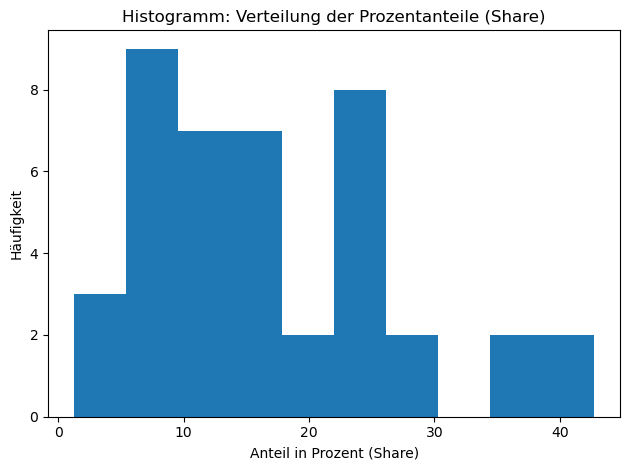

In [82]:
df_long["Share"].plot(kind="hist", bins=10)
plt.xlabel("Anteil in Prozent (Share)")
plt.ylabel("Häufigkeit")
plt.title("Histogramm: Verteilung der Prozentanteile (Share)")
plt.tight_layout()
plt.show()


Das Histogramm zeigt die Verteilung der prozentualen Anteile („Share“)
über alle Regionen und Alterskategorien hinweg.

Die Werte verteilen sich über einen breiten Bereich, wobei ein Großteil
der Beobachtungen im niedrigen bis mittleren Prozentbereich liegt.
Einzelne Beobachtungen erreichen sehr hohe Werte von über 40 Prozent,
was insbesondere auf die Kategorie „Don’t know / Refused“ in bestimmten
Regionen zurückzuführen ist.

Die Verteilung ist damit rechtsschief, da wenige hohe Werte einen langen
rechten Rand der Verteilung bilden.


### 3.5 Boxplot nach Alterskategorie

<Figure size 800x400 with 0 Axes>

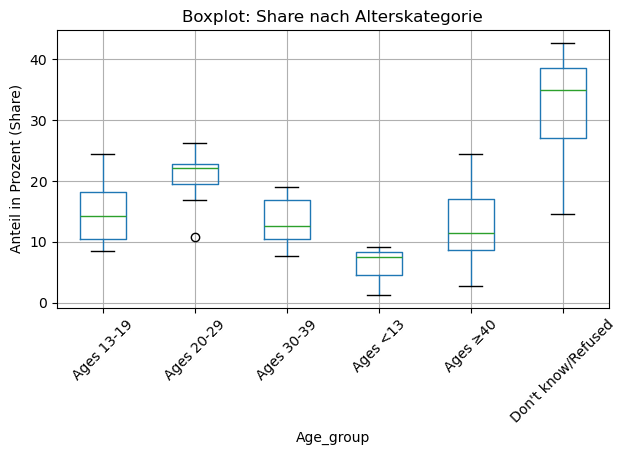

In [83]:
plt.figure(figsize=(8,4))
df_long.boxplot(column="Share", by="Age_group", rot=45)
plt.ylabel("Anteil in Prozent (Share)")
plt.title("Boxplot: Share nach Alterskategorie")
plt.suptitle("")
plt.tight_layout()
plt.show()


Der Boxplot zeigt deutliche Unterschiede in der Verteilung der
prozentualen Anteile zwischen den Alterskategorien.

Die Altersgruppen zwischen 13 und 29 Jahren weisen vergleichsweise
hohe Medianwerte auf, was darauf hindeutet, dass ein großer Anteil der
Befragten in diesen Altersphasen erstmals Angst- oder
Depressionssymptome erlebt hat.

Die Kategorie „Don’t know / Refused“ weist sowohl den höchsten Median
als auch die größte Streuung auf. Dies deutet auf starke regionale
Unterschiede sowie Unsicherheiten bei der Erinnerung an den Zeitpunkt
des erstmaligen Auftretens hin.

Die Altersgruppe „Ages <13“ zeigt hingegen niedrigere Medianwerte und
eine geringere Streuung.


## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



### Beobachtungen
- 

### Interpretation
- "Interpretation der Resultate (Hypothesen zu den Resultaten)" "Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen)"

### Berechnungen
- "Spezifische Untersuchung der Fragestellung (Berechnungen)"

### Visualisierung
- "Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)"